In [7]:
from pathlib import Path
import sys
def get_base_path():
    """
    Devuelve la ruta base del proyecto.
    - Si se ejecuta como script (.py), usa __file__
    - Si se ejecuta en notebook, usa el cwd()
    """
    if hasattr(sys.modules['__main__'], '__file__'):
        return Path(sys.modules['__main__'].__file__).resolve().parent
    else:
        return Path.cwd()
def search_file(start_path, filename):
    for path in start_path.rglob("*"):
        if path.name == filename:
            return path
    return None

FASE 1: COMPRENSIÓN DEL NEGOCIO (Business Understanding)

OBJETIVO: Predecir el resultado (éxito/fracaso) de cultivos basándose en:
- Tipo de cultivo (crop ID)
- Tipo de suelo (soil_type)
- Etapa de plántula (Seedling Stage)
- MOI (Índice de humedad del suelo)
- Temperatura
- Humedad ambiental

PROBLEMA: Clasificación binaria (result: 0 = fracaso, 1 = éxito)


FASE 2: COMPRENSIÓN DE LOS DATOS (Data Understanding)
✅ Archivo encontrado en: c:\Users\John\OneDrive - Universidad Nacional Mayor de San Marcos\Escritorio\Proyectos_Personales\PythonProjects\SistemaInteligentedePredictRiesgo\dataSalvadora.xlsx

📊 Dimensiones del dataset: 15288 filas x 7 columnas

📋 Columnas: ['crop ID', 'soil_type', 'Seedling Stage', 'MOI', 'temp', 'humidity', 'result']

🔍 Tipos de datos:
crop ID           object
soil_type         object
Seedling Stage    object
MOI                int64
temp               int64
humidity           int64
result             int64
dtype: object

📈 Primeras filas del dataset:
  crop 

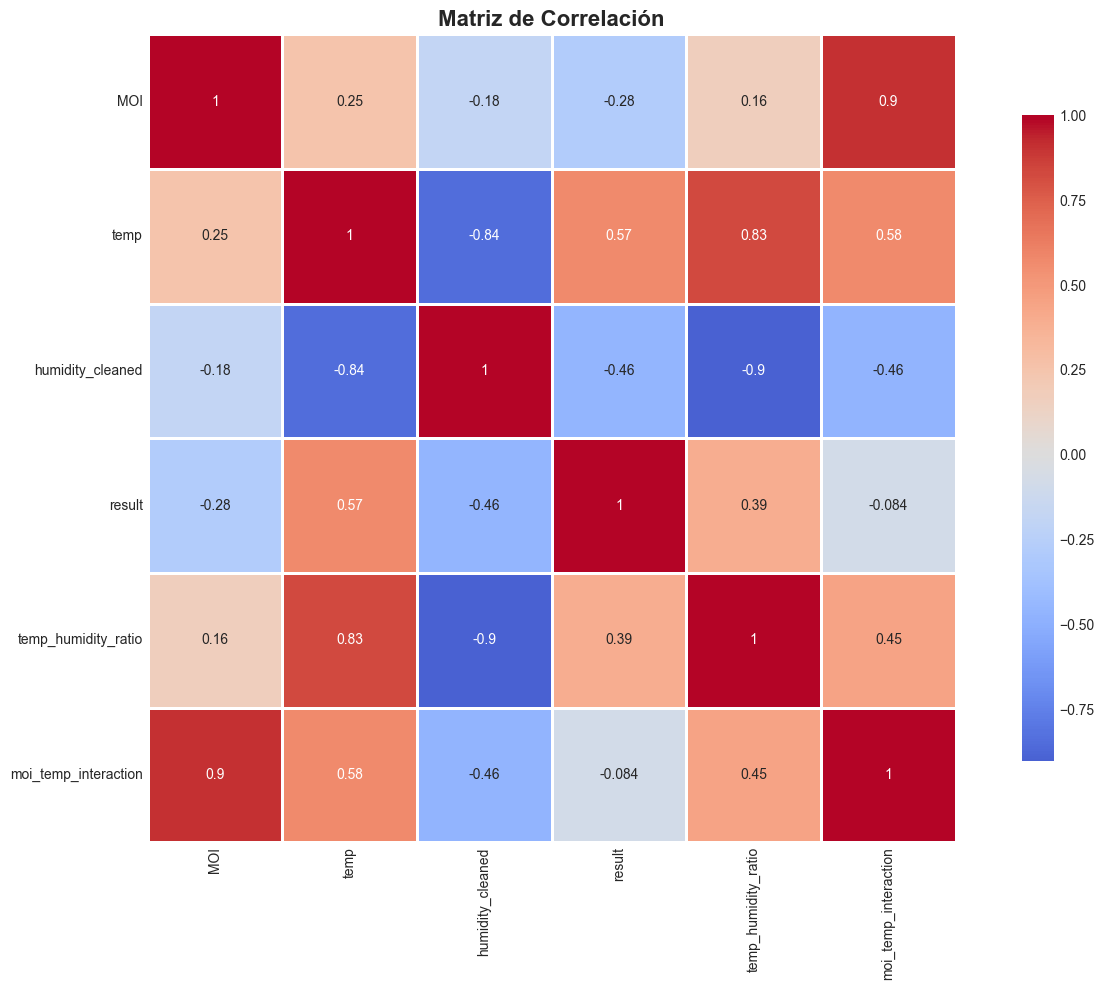

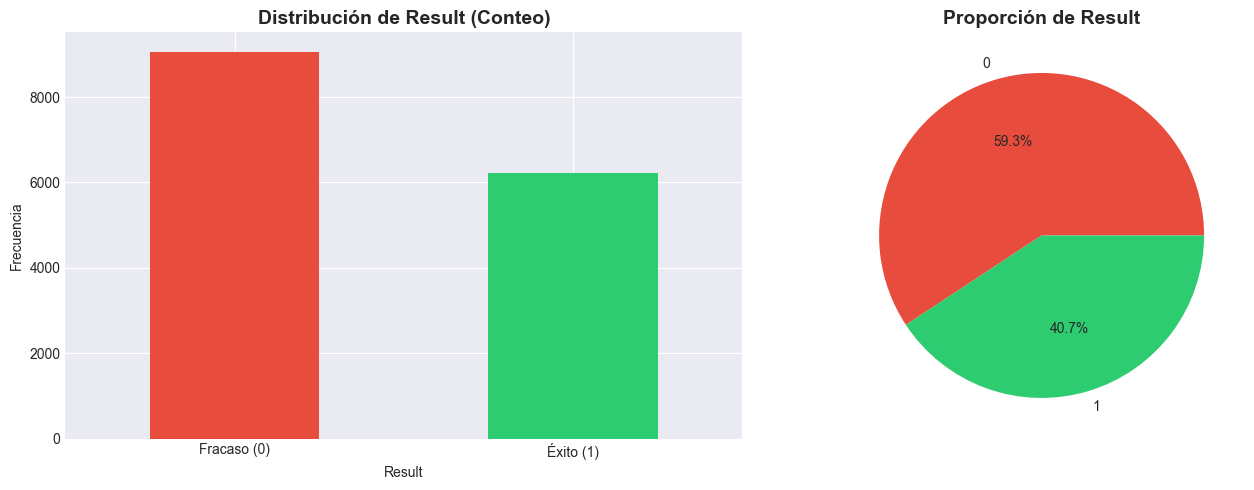


FASE 4: MODELADO (Modeling)

📊 Tamaño del conjunto de entrenamiento: 12230 muestras
📊 Tamaño del conjunto de prueba: 3058 muestras

⚖️ Ratio de desbalanceo: 1.46
⚠️ No se requiere SMOTE

ENTRENAMIENTO DE MODELOS

🔄 Entrenando Logistic Regression...

🔄 Entrenando Gradient Boosting...

🔄 Entrenando Random Forest...

🔄 Entrenando XGBoost...

🔄 Entrenando SVM...

🔄 Entrenando K-Nearest Neighbors...

🔄 Entrenando Naive Bayes...

🔄 Entrenando AdaBoost...

RESULTADOS DE TODOS LOS MODELOS

📊 Comparación de modelos (ordenados por F1-Score):

              Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC  Avg_Precision  CV_Mean   CV_Std
            XGBoost  0.999346   0.999197 0.999197  0.999197 0.999997       0.999996 0.998610 0.001430
      Random Forest  0.990844   0.981789 0.995984  0.988836 0.999579       0.999344 0.988307 0.001407
  Gradient Boosting  0.987574   0.976322 0.993574  0.984873 0.999175       0.998770 0.987980 0.001627
           AdaBoost  0.974166   0.962698 0.974297  0

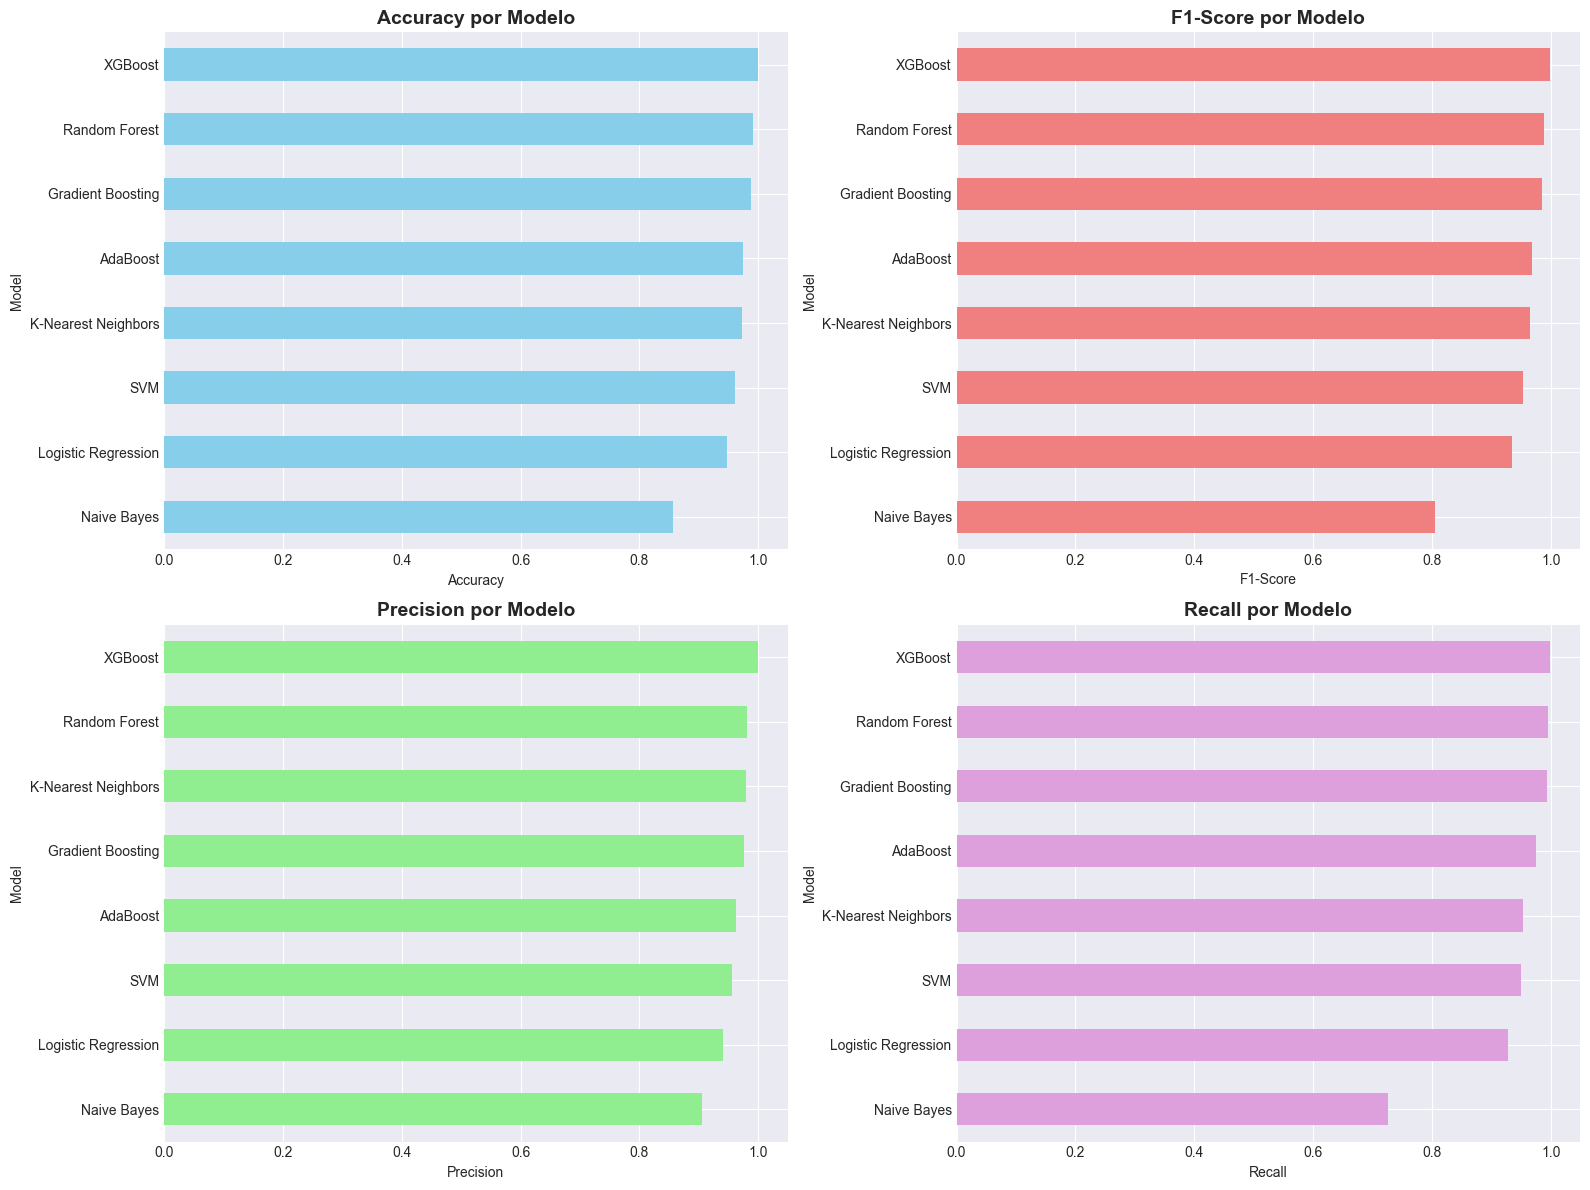


ANÁLISIS DEL MEJOR MODELO

🏆 MEJOR MODELO: XGBoost

📊 MÉTRICAS DEL MEJOR MODELO:
Accuracy:        0.9993
Precision:       0.9992
Recall:          0.9992
F1-Score:        0.9992
ROC-AUC:         1.0000
Avg Precision:   1.0000
CV Mean:         0.9986
CV Std:          0.0014

REPORTE DE CLASIFICACIÓN DETALLADO
              precision    recall  f1-score   support

 Fracaso (0)       1.00      1.00      1.00      1813
   Éxito (1)       1.00      1.00      1.00      1245

    accuracy                           1.00      3058
   macro avg       1.00      1.00      1.00      3058
weighted avg       1.00      1.00      1.00      3058


MATRIZ DE CONFUSIÓN
[[1812    1]
 [   1 1244]]


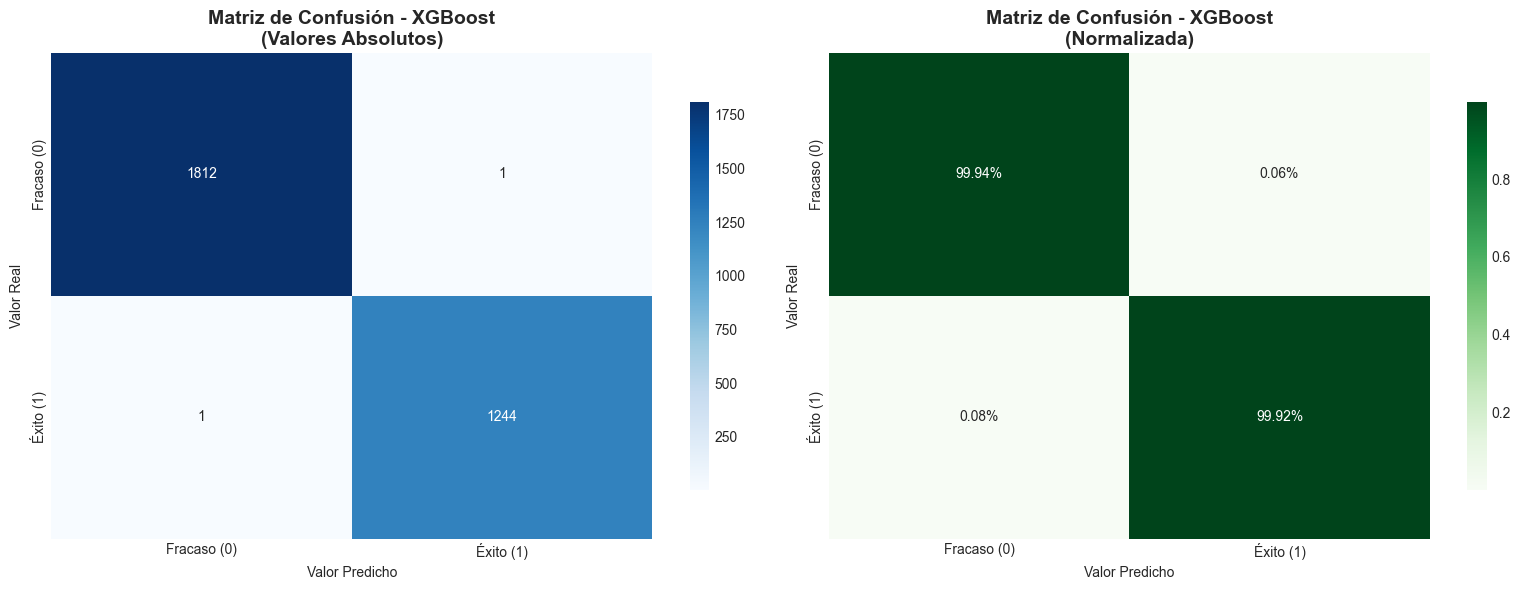


📊 INTERPRETACIÓN DE LA MATRIZ DE CONFUSIÓN:
✅ Verdaderos Negativos (TN): 1812 - Fracasos correctamente predichos
❌ Falsos Positivos (FP): 1 - Fracasos predichos como éxitos
❌ Falsos Negativos (FN): 1 - Éxitos predichos como fracasos
✅ Verdaderos Positivos (TP): 1244 - Éxitos correctamente predichos


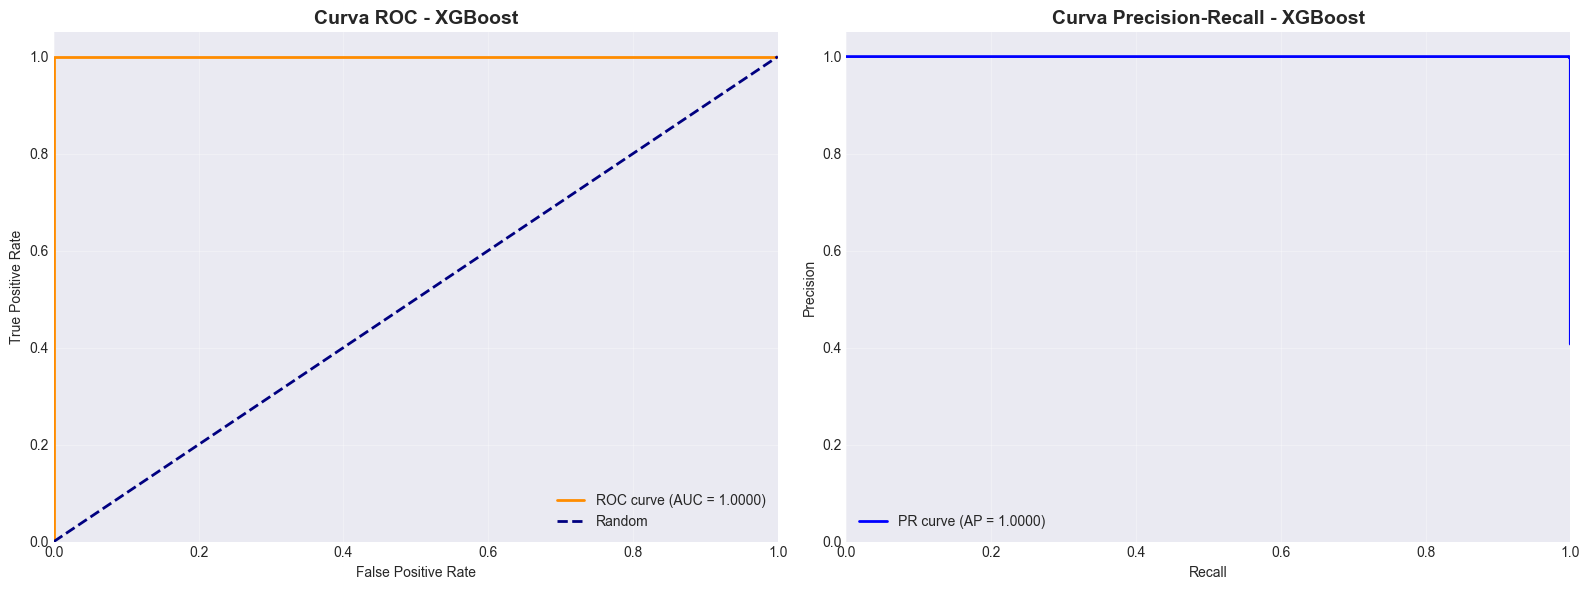


✅ ANÁLISIS COMPLETADO

🎯 El mejor modelo es: XGBoost
📊 Con un F1-Score de: 0.9992
🎯 Y una Accuracy de: 0.9993


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Librerías de Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score,
                             precision_score, recall_score, f1_score, roc_auc_score,
                             roc_curve, precision_recall_curve, average_precision_score)

# Modelos de Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier,
                               AdaBoostClassifier, ExtraTreesClassifier)
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# SMOTE para balanceo de clases
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("="*80)
print("FASE 1: COMPRENSIÓN DEL NEGOCIO (Business Understanding)")
print("="*80)
print("""
OBJETIVO: Predecir el resultado (éxito/fracaso) de cultivos basándose en:
- Tipo de cultivo (crop ID)
- Tipo de suelo (soil_type)
- Etapa de plántula (Seedling Stage)
- MOI (Índice de humedad del suelo)
- Temperatura
- Humedad ambiental

PROBLEMA: Clasificación binaria (result: 0 = fracaso, 1 = éxito)
""")

print("\n" + "="*80)
print("FASE 2: COMPRENSIÓN DE LOS DATOS (Data Understanding)")
print("="*80)

import pandas as pd
from pathlib import Path

BASE = get_base_path()
archivo_nombre = search_file(BASE, "dataSalvadora.xlsx")

if archivo_nombre is None:
    parent = BASE.parent
    while parent != parent.parent:   # Hasta llegar a la raíz del disco
        archivo_nombre = search_file(parent, "dataSalvadora.xlsx")
        if archivo_nombre:
            break
        parent = parent.parent

# 4. Validar si se encontró el archivo
if archivo_nombre is None:
    raise FileNotFoundError("❌ No se encontró 'dataSalvadora.xlsx' en ninguna carpeta del proyecto o superiores.")

print("✅ Archivo encontrado en:", archivo_nombre)

# 5. Crear carpetas dinámicas
visual_dir = BASE / "visualizaciones1"
models_dir = BASE / "modelos_guardados"
visual_dir.mkdir(parents=True, exist_ok=True)
models_dir.mkdir(parents=True, exist_ok=True)

# Leer el archivo Excel
df = pd.read_excel(archivo_nombre)

# Mostrar información del dataset
print(f"\n📊 Dimensiones del dataset: {df.shape[0]} filas x {df.shape[1]} columnas")
print(f"\n📋 Columnas: {df.columns.tolist()}")
print(f"\n🔍 Tipos de datos:\n{df.dtypes}")
print(f"\n📈 Primeras filas del dataset:")
print(df.head(10))


# Información estadística
print("\n" + "="*80)
print("ESTADÍSTICAS DESCRIPTIVAS")
print("="*80)
print(df.describe())

# Valores únicos en variables categóricas
print("\n📌 Valores únicos en variables categóricas:")
for col in ['crop ID', 'soil_type', 'Seedling Stage']:
    print(f"\n{col}: {df[col].nunique()} valores únicos")
    print(df[col].value_counts())

# Distribución de la variable objetivo
print("\n🎯 Distribución de la variable objetivo (result):")
print(df['result'].value_counts())
print(f"\nProporción:")
print(df['result'].value_counts(normalize=True))

# Valores nulos
print("\n❓ Valores nulos por columna:")
print(df.isnull().sum())

print("\n" + "="*80)
print("FASE 3: PREPARACIÓN DE LOS DATOS (Data Preparation)")
print("="*80)

# Copiar dataset original
df_original = df.copy()

# 3.1 Limpieza de datos
print("\n🧹 Paso 3.1: Limpieza de datos")
print(f"\nOutliers detectados en humidity: {len(df[df['humidity'] > 200])} registros")
print(f"Rango actual de humidity: [{df['humidity'].min()}, {df['humidity'].max()}]")

# Limitar humidity a valores razonables (0-100%)
df['humidity_cleaned'] = df['humidity'].clip(upper=100)
print(f"Rango corregido de humidity: [{df['humidity_cleaned'].min()}, {df['humidity_cleaned'].max()}]")

# 3.2 Codificación de variables categóricas
print("\n🔤 Paso 3.2: Codificación de variables categóricas")

# Label Encoding para variables categóricas
le_crop = LabelEncoder()
le_soil = LabelEncoder()
le_seedling = LabelEncoder()

df['crop_encoded'] = le_crop.fit_transform(df['crop ID'])
df['soil_encoded'] = le_soil.fit_transform(df['soil_type'])
df['seedling_encoded'] = le_seedling.fit_transform(df['Seedling Stage'])

# 3.3 Ingeniería de características
print("\n⚙️ Paso 3.3: Ingeniería de características")

df['temp_humidity_ratio'] = df['temp'] / (df['humidity_cleaned'] + 1)
df['moi_temp_interaction'] = df['MOI'] * df['temp']
df['temp_squared'] = df['temp'] ** 2
df['humidity_squared'] = df['humidity_cleaned'] ** 2
df['moi_squared'] = df['MOI'] ** 2

print("Nuevas características creadas:")
print("- temp_humidity_ratio: Relación temperatura/humedad")
print("- moi_temp_interaction: Interacción MOI x temperatura")
print("- temp_squared, humidity_squared, moi_squared: Términos cuadráticos")

# Seleccionar características finales
feature_cols = ['crop_encoded', 'soil_encoded', 'seedling_encoded', 'MOI', 
                'temp', 'humidity_cleaned', 'temp_humidity_ratio', 
                'moi_temp_interaction', 'temp_squared', 'humidity_squared', 'moi_squared']

X = df[feature_cols]
y = df['result']

print(f"\n✅ Dataset preparado con {X.shape[1]} características")

print("\n" + "="*80)
print("EXPLORACIÓN VISUAL DE DATOS (EDA)")
print("="*80)

# 1. Matriz de correlación
plt.figure(figsize=(14, 10))
correlation_matrix = df[['MOI', 'temp', 'humidity_cleaned', 'result', 
                         'temp_humidity_ratio', 'moi_temp_interaction']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# 2. Distribución de la variable objetivo
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
df['result'].value_counts().plot(kind='bar', ax=axes[0], color=['#e74c3c', '#2ecc71'])
axes[0].set_title('Distribución de Result (Conteo)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Result')
axes[0].set_ylabel('Frecuencia')
axes[0].set_xticklabels(['Fracaso (0)', 'Éxito (1)'], rotation=0)

df['result'].value_counts(normalize=True).plot(kind='pie', ax=axes[1], 
                                                autopct='%1.1f%%', 
                                                colors=['#e74c3c', '#2ecc71'])
axes[1].set_title('Proporción de Result', fontsize=14, fontweight='bold')
axes[1].set_ylabel('')
plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("FASE 4: MODELADO (Modeling)")
print("="*80)

# División del dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                      random_state=42, stratify=y)

print(f"\n📊 Tamaño del conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"📊 Tamaño del conjunto de prueba: {X_test.shape[0]} muestras")

# Escalado de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Verificar si se necesita SMOTE
class_distribution = y_train.value_counts()
minority_class = class_distribution.min()
majority_class = class_distribution.max()
imbalance_ratio = majority_class / minority_class

print(f"\n⚖️ Ratio de desbalanceo: {imbalance_ratio:.2f}")
use_smote = imbalance_ratio > 1.5

if use_smote:
    print("✅ Aplicando SMOTE para balancear las clases...")
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)
    print(f"Distribución después de SMOTE: {pd.Series(y_train_resampled).value_counts()}")
else:
    print("⚠️ No se requiere SMOTE")
    X_train_resampled = X_train_scaled
    y_train_resampled = y_train

# Entrenamiento de modelos
print("\n" + "="*80)
print("ENTRENAMIENTO DE MODELOS")
print("="*80)

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(n_estimators=100, random_state=42, eval_metric='logloss'),
    'SVM': SVC(probability=True, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
}

# Evaluar y almacenar resultados
results = []
trained_models = {}

# Entrenamiento y evaluación de los modelos
for name, model in models.items():
    print(f"\n🔄 Entrenando {name}...")
    model.fit(X_train_resampled, y_train_resampled)
    
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, 'predict_proba') else None
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    
    if y_pred_proba is not None:
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        avg_precision = average_precision_score(y_test, y_pred_proba)
    else:
        roc_auc = np.nan
        avg_precision = np.nan
    
    cv_scores = cross_val_score(model, X_train_resampled, y_train_resampled, 
                                cv=5, scoring='accuracy')
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()
    
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'Avg_Precision': avg_precision,
        'CV_Mean': cv_mean,
        'CV_Std': cv_std
    })
    
    trained_models[name] = {
        'model': model,
        'predictions': y_pred,
        'probabilities': y_pred_proba
    }

print("\n" + "="*80)
print("RESULTADOS DE TODOS LOS MODELOS")
print("="*80)

# Crear DataFrame con resultados
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('F1-Score', ascending=False)
print("\n📊 Comparación de modelos (ordenados por F1-Score):\n")
print(results_df.to_string(index=False))

# Visualización de comparación de modelos
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Accuracy
results_df.sort_values('Accuracy').plot(x='Model', y='Accuracy', kind='barh', 
                                        ax=axes[0,0], color='skyblue', legend=False)
axes[0,0].set_title('Accuracy por Modelo', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Accuracy')

# F1-Score
results_df.sort_values('F1-Score').plot(x='Model', y='F1-Score', kind='barh', 
                                        ax=axes[0,1], color='lightcoral', legend=False)
axes[0,1].set_title('F1-Score por Modelo', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('F1-Score')

# Precision
results_df.sort_values('Precision').plot(x='Model', y='Precision', kind='barh', 
                                         ax=axes[1,0], color='lightgreen', legend=False)
axes[1,0].set_title('Precision por Modelo', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Precision')

# Recall
results_df.sort_values('Recall').plot(x='Model', y='Recall', kind='barh', 
                                      ax=axes[1,1], color='plum', legend=False)
axes[1,1].set_title('Recall por Modelo', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Recall')

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("ANÁLISIS DEL MEJOR MODELO")
print("="*80)

# Identificar el mejor modelo
best_model_name = results_df.iloc[0]['Model']
best_model_info = trained_models[best_model_name]
best_model = best_model_info['model']
best_predictions = best_model_info['predictions']
best_probabilities = best_model_info['probabilities']

print(f"\n🏆 MEJOR MODELO: {best_model_name}")
print(f"\n📊 MÉTRICAS DEL MEJOR MODELO:")
print("="*50)
best_metrics = results_df.iloc[0]
print(f"Accuracy:        {best_metrics['Accuracy']:.4f}")
print(f"Precision:       {best_metrics['Precision']:.4f}")
print(f"Recall:          {best_metrics['Recall']:.4f}")
print(f"F1-Score:        {best_metrics['F1-Score']:.4f}")
print(f"ROC-AUC:         {best_metrics['ROC-AUC']:.4f}")
print(f"Avg Precision:   {best_metrics['Avg_Precision']:.4f}")
print(f"CV Mean:         {best_metrics['CV_Mean']:.4f}")
print(f"CV Std:          {best_metrics['CV_Std']:.4f}")

print("\n" + "="*50)
print("REPORTE DE CLASIFICACIÓN DETALLADO")
print("="*50)
print(classification_report(y_test, best_predictions, 
                          target_names=['Fracaso (0)', 'Éxito (1)']))

# Matriz de Confusión
print("\n" + "="*50)
print("MATRIZ DE CONFUSIÓN")
print("="*50)

cm = confusion_matrix(y_test, best_predictions)
print(cm)

# Visualización de la Matriz de Confusión
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Matriz de confusión con valores absolutos
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0], 
            xticklabels=['Fracaso (0)', 'Éxito (1)'], 
            yticklabels=['Fracaso (0)', 'Éxito (1)'],
            cbar_kws={"shrink": 0.8})
axes[0].set_title(f'Matriz de Confusión - {best_model_name}\n(Valores Absolutos)', 
                 fontsize=14, fontweight='bold')
axes[0].set_ylabel('Valor Real')
axes[0].set_xlabel('Valor Predicho')

# Matriz de confusión normalizada
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Greens', ax=axes[1],
            xticklabels=['Fracaso (0)', 'Éxito (1)'], 
            yticklabels=['Fracaso (0)', 'Éxito (1)'],
            cbar_kws={"shrink": 0.8})
axes[1].set_title(f'Matriz de Confusión - {best_model_name}\n(Normalizada)', 
                 fontsize=14, fontweight='bold')
axes[1].set_ylabel('Valor Real')
axes[1].set_xlabel('Valor Predicho')

plt.tight_layout()
plt.show()

# Interpretación de la matriz de confusión
print("\n📊 INTERPRETACIÓN DE LA MATRIZ DE CONFUSIÓN:")
print("="*50)
tn, fp, fn, tp = cm.ravel()
print(f"✅ Verdaderos Negativos (TN): {tn} - Fracasos correctamente predichos")
print(f"❌ Falsos Positivos (FP): {fp} - Fracasos predichos como éxitos")
print(f"❌ Falsos Negativos (FN): {fn} - Éxitos predichos como fracasos")
print(f"✅ Verdaderos Positivos (TP): {tp} - Éxitos correctamente predichos")

# Curvas ROC y Precision-Recall si hay probabilidades
if best_probabilities is not None:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Curva ROC
    fpr, tpr, _ = roc_curve(y_test, best_probabilities)
    roc_auc = roc_auc_score(y_test, best_probabilities)
    
    axes[0].plot(fpr, tpr, color='darkorange', lw=2, 
                label=f'ROC curve (AUC = {roc_auc:.4f})')
    axes[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
    axes[0].set_xlim([0.0, 1.0])
    axes[0].set_ylim([0.0, 1.05])
    axes[0].set_xlabel('False Positive Rate')
    axes[0].set_ylabel('True Positive Rate')
    axes[0].set_title(f'Curva ROC - {best_model_name}', fontsize=14, fontweight='bold')
    axes[0].legend(loc="lower right")
    axes[0].grid(alpha=0.3)
    
    # Curva Precision-Recall
    precision_vals, recall_vals, _ = precision_recall_curve(y_test, best_probabilities)
    avg_precision = average_precision_score(y_test, best_probabilities)
    
    axes[1].plot(recall_vals, precision_vals, color='blue', lw=2,
                label=f'PR curve (AP = {avg_precision:.4f})')
    axes[1].set_xlim([0.0, 1.0])
    axes[1].set_ylim([0.0, 1.05])
    axes[1].set_xlabel('Recall')
    axes[1].set_ylabel('Precision')
    axes[1].set_title(f'Curva Precision-Recall - {best_model_name}', 
                     fontsize=14, fontweight='bold')
    axes[1].legend(loc="lower left")
    axes[1].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()

print("\n" + "="*80)
print("✅ ANÁLISIS COMPLETADO")
print("="*80)
print(f"\n🎯 El mejor modelo es: {best_model_name}")
print(f"📊 Con un F1-Score de: {best_metrics['F1-Score']:.4f}")
print(f"🎯 Y una Accuracy de: {best_metrics['Accuracy']:.4f}")